In [1]:
from easyocr import Reader
import video
import matplotlib.pyplot as plt
import argparse
import cv2

In [2]:
def cleanupText(text):
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [3]:
def getText(frame):
        #print("[INFO] OCR'ing input image. . .")
        reader = Reader(['en'])
        results = reader.readtext(frame)

        for (BBOX, TEXT, PROB) in results: 
            #print("[INFO] {:.4f}: {}".format(PROB, TEXT))

            (TL, TR, BR, BL) = BBOX
            TL = (int(TL[0]), int(TL[1]))
            TR = (int(TR[0]), int(TR[1]))
            BR = (int(BR[0]), int(BR[1]))
            BL = (int(BL[0]), int(BL[1]))

            TEXT = cleanupText(TEXT)
            cv2.rectangle(frame, TL, BR, (0, 255, 0), 2)
            cv2.putText(frame, TEXT, (TL[0], TL[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        return cv2.cvtColor(frame, cv2.COLOR_BGR2RGB); 

In [4]:
def getTextVideo(vidFrames, frameCount): 
    idx = 0
    markedFrames = []
    while(idx < frameCount):
        markedFrames.append(getText(vidFrames[idx]))
        idx = idx + 1
        
    return markedFrames;

In [5]:
def main(): 
    print("OpenCV Version : {}".format(cv2.__version__))
    
    #0 means image, 1 means video
    inFileType = 0 
    pathIn = 'example.jpg'
    pathOut = 'output.mp4'
    
    if(inFileType == 0): 
        markedFrame = getText(cv2.imread(pathIn))
        plt.axis("off")
        plt.imshow(markedFrame)
        plt.show()
        
    elif(inFileType == 1): 
        vidCapture = cv2.VideoCapture(pathIn)
        if(vidCapture.isOpened() == True):
            fps, frameCount, frameWidth, frameHeight = video.getVideoInfo(vidCapture)
            size = (frameWidth, frameHeight)
            vidFrames = video.getFrames(vidCapture, frameCount)
            markedFrames = getTextVideo(vidFrames, frameCount)
            video.generateVideo(markedFrames, fps, size, pathOut)

        else: 
            print("Error opening the video file")
    else: 
        print("Error opening the image file")
        
    print("--Execution Complete--")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


OpenCV Version : 4.5.3


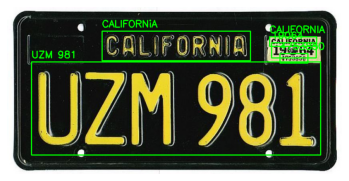

--Execution Complete--


In [6]:
if __name__ == "__main__":
    main()